In [3]:
import sys

from pathlib import Path
from datetime import timedelta
import seaborn as sns
import dateutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import trange
import warnings
warnings.filterwarnings('ignore')

In [72]:
# 2.0 DATA

TRAIN_DATASET1 = sorted([x for x in Path("C:/Users/5788j/Desktop/데이콘 보안 탐지 딥러닝 데이터/dacon boan/HAI 2.0/training/").glob("*.csv")])

TEST_DATASET2 = sorted([x for x in Path("C:/Users/5788j/Desktop/데이콘 보안 탐지 딥러닝 데이터/dacon boan/HAI 2.0/testing/").glob("*.csv")])

VALIDATION_DATASET3 = sorted([x for x in Path("C:/Users/5788j/Desktop/데이콘 보안 탐지 딥러닝 데이터/dacon boan/HAI 2.0/validation/").glob("*.csv")])


In [5]:
# 1.0 DATA

TRAIN_DATASET11 = sorted([x for x in Path("C:/Users/5788j/Desktop/데이콘 보안 탐지 딥러닝 데이터/dacon boan/HAI 1.0/train-dataset/").glob("*.csv")])

TEST_DATASET22 = sorted([x for x in Path("C:/Users/5788j/Desktop/데이콘 보안 탐지 딥러닝 데이터/dacon boan/HAI 1.0/test-dataset/").glob("*.csv")])



In [73]:
# 함수 지정
# 2.0 데이터
def dataframe_from_csv(target):
    return pd.read_csv(target).rename(columns=lambda x: x.strip())

def dataframe_from_csvs(targets):
    return pd.concat([dataframe_from_csv(x) for x in targets])

# 함수 적용
TRAIN_DF_RAW_2=dataframe_from_csvs(TRAIN_DATASET1)
# TRAIN_DF_RAW_2


TEST_DF_RAW_2=dataframe_from_csvs(TEST_DATASET2)
# TEST_DF_RAW_2

VALIDATION_DATASET_RAW_2=dataframe_from_csvs(VALIDATION_DATASET3)
# VALIDATION_DATASET_RAW_2

In [7]:
# 함수 지정
# 1.0 데이터
def dataframe_from_csv(target):
    return pd.read_csv(target).rename(columns=lambda x: x.strip())

def dataframe_from_csvs(targets):
    return pd.concat([dataframe_from_csv(x) for x in targets])

# 함수 적용
TRAIN_DF_RAW_1=dataframe_from_csvs(TRAIN_DATASET11)
# TRAIN_DF_RAW


TEST_DF_RAW_1=dataframe_from_csvs(TEST_DATASET22)
# TEST_DF_RAW


In [124]:
TRAIN_DF_RAW_2

,time,C01,C02,C03,C04,C05,C06,C07,C08,C09,...,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79
0,2020-07-11 00:00:00,395.19528,12,10,52.80456,-1.2648,-1.87531,779.59595,28.02645,10832.0,...,808.29620,0.0,1.36810,8.79882,35.43700,12.01782,305.03113,301.35992,33.6555,6.0951
1,2020-07-11 00:00:01,395.14420,12,10,52.78931,-1.3147,-1.88294,780.67328,28.02473,10984.0,...,819.16809,0.0,1.36810,8.78811,35.45227,12.01782,304.27161,297.43567,33.6555,5.9262
2,2020-07-11 00:00:02,395.14420,12,10,52.79694,-1.4032,-1.88294,780.06574,28.02817,11120.0,...,823.51697,0.0,1.36734,8.81787,35.45227,12.01782,303.89179,298.66534,33.6555,5.8101
3,2020-07-11 00:00:03,395.19528,12,10,52.79694,-1.6074,-1.88294,780.15265,28.02301,11256.0,...,823.95172,0.0,1.36734,8.87493,35.43700,12.01782,303.67474,298.06860,33.6555,5.7509
4,2020-07-11 00:00:04,395.34866,12,10,52.79694,-1.7811,-1.88294,781.83160,28.03595,11384.0,...,827.86560,0.0,1.36810,8.83838,35.45227,12.01782,303.22266,296.53137,33.6555,5.8547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478796,2020-08-10 10:59:56,387.27219,12,10,66.72057,-0.9331,-1.84479,781.87915,28.02389,880.0,...,944.84705,0.0,1.32843,15.17817,35.14710,11.79657,316.89453,296.54950,32.0000,6.6026
478797,2020-08-10 10:59:57,387.52774,12,10,66.72057,-0.9996,-1.84479,787.65070,28.02385,840.0,...,940.49835,0.0,1.32843,15.17344,35.13183,11.79657,315.59247,296.15161,32.0000,6.3894
478798,2020-08-10 10:59:58,387.47665,12,10,66.72057,-1.2560,-1.84479,788.50256,28.03085,792.0,...,935.71472,0.0,1.32919,15.16443,35.13183,11.79657,313.92865,293.40277,32.0000,6.2584
478799,2020-08-10 10:59:59,387.73221,12,10,66.72057,-1.4912,-1.84479,785.80316,28.02649,752.0,...,944.84705,0.0,1.32843,15.09001,35.14710,11.79657,315.61054,302.58972,32.0000,6.4150


In [125]:
TEST_DF_RAW_2

,time,C01,C02,C03,C04,C05,C06,C07,C08,C09,...,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79
0,2020-07-09 15:00:00,384.30737,12.0,10,70.35980,-1.6171,-1.79901,774.20752,28.02385,136,...,936.58447,0.0,1.35437,13.97231,35.22338,12.02545,293.51129,283.92651,32.0,6.5059
1,2020-07-09 15:00:01,384.30737,12.0,10,70.35980,-1.7606,-1.79901,772.58758,28.02730,136,...,940.93317,0.0,1.35437,13.93358,35.20813,12.02545,292.67938,283.36591,32.0,6.3079
2,2020-07-09 15:00:02,384.20517,12.0,10,70.35980,-1.7606,-1.80664,772.58758,28.02730,136,...,936.58447,0.0,1.35513,13.95248,35.20813,12.02545,291.90179,282.93189,32.0,6.3079
3,2020-07-09 15:00:03,384.25626,12.0,10,70.35980,-1.7814,-1.79901,777.48810,28.02905,136,...,933.54034,0.0,1.35513,13.89971,35.20813,12.02545,291.59430,282.06378,32.0,6.1203
4,2020-07-09 15:00:04,384.20517,12.0,10,70.35980,-1.7370,-1.79901,778.42212,28.03169,136,...,944.41223,0.0,1.35437,13.94603,35.20813,12.02545,289.87628,283.67334,32.0,5.9543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92396,2020-07-31 12:29:56,420.08923,12.0,10,48.31848,-0.8706,97.19238,786.54382,28.03253,232,...,824.82147,100.0,1.35666,9.62203,36.47460,11.78894,357.27722,361.14728,32.0,6.2809
92397,2020-07-31 12:29:57,420.08923,12.0,10,48.31848,-0.7498,97.19238,784.07184,28.03598,224,...,823.51697,100.0,1.35513,9.48747,36.47460,11.78894,357.29529,359.84521,32.0,6.3602
92398,2020-07-31 12:29:58,420.24258,12.0,10,48.31848,-0.6076,97.19238,786.83881,28.02642,208,...,824.82147,100.0,1.35666,9.57787,36.48986,11.78894,357.27722,360.60474,32.0,6.3742
92399,2020-07-31 12:29:59,420.24258,12.0,10,48.31848,-0.4618,97.19238,786.66138,28.03341,200,...,833.51904,100.0,1.35513,9.56291,36.48986,11.78894,357.80170,357.42188,32.0,6.2864


In [115]:
# 컬럼 분류
TIMESTAMP_FIELD = "time"
IDSTAMP_FIELD = 'id'
ATTACK_FIELD = "attack"
features_1 = TRAIN_DF_RAW_1.columns.drop([TIMESTAMP_FIELD])
features_1 = TRAIN_DF_RAW_1[features_1].columns[:-4]

features_2 = TRAIN_DF_RAW_2.columns.drop([TIMESTAMP_FIELD])

In [75]:
# 컬럼 분류
TIMESTAMP_FIELD = "time"
IDSTAMP_FIELD = 'id'
ATTACK_FIELD = "attack"

# df 조정
train_2=TRAIN_DF_RAW_2[features_2]
validation_2=VALIDATION_DATASET_RAW_2[features_2]




# attack 컬럼 min-max정규화 함수
def normalize(df):
    TAG_MIN = df.min()
    TAG_MAX = df.max()
    ndf = df.copy()
    for c in df.columns:
        if TAG_MIN[c] == TAG_MAX[c]:    # 최대값 최소값이 똑같은 컬럼
            ndf[c] = df[c] - TAG_MIN[c]
        else:
            ndf[c] = (df[c] - TAG_MIN[c]) / (TAG_MAX[c] - TAG_MIN[c])
    return ndf

In [76]:
train_2=normalize(train_2)
validation_2=normalize(validation_2)

In [122]:
test_2=TEST_DF_RAW_2[features_2]
test_2=normalize(test_2)

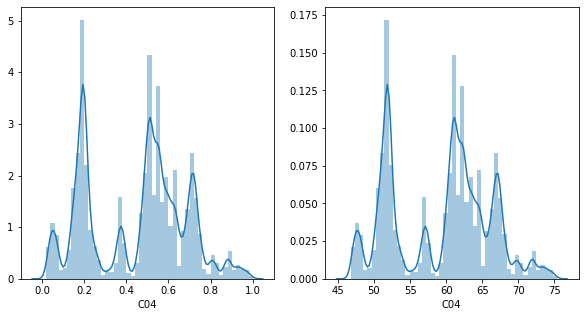

In [27]:
# 스케일러 정상
f, ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(train_2['C04'],ax=ax[0])
sns.distplot(TRAIN_DF_RAW_2['C04'],ax=ax[1])

# 어택상황별 왜도 비교하기

In [77]:
validation_22=pd.concat([validation_2,pd.DataFrame(VALIDATION_DATASET_RAW_2['attack'])],axis=1)

In [87]:
att1=validation_22[validation_22['attack']==1].head(192)
att2=validation_22[validation_22['attack']==1].iloc[192:290,:]
att3=validation_22[validation_22['attack']==1].iloc[290:480,:]
att4=validation_22[validation_22['attack']==1].iloc[480:540,:]
att5=validation_22[validation_22['attack']==1].iloc[540:,:]

In [50]:
print("Skewness: {:.3f}".format(train_2["C01"].skew()))
print("Skewness: {:.3f}".format(validation_2["C01"].skew()))

Skewness: 0.730
Skewness: 10.104


In [98]:
validation_22.shape

(43201, 80)

# 왜도 첨도는 너무 애매할 것 같음...


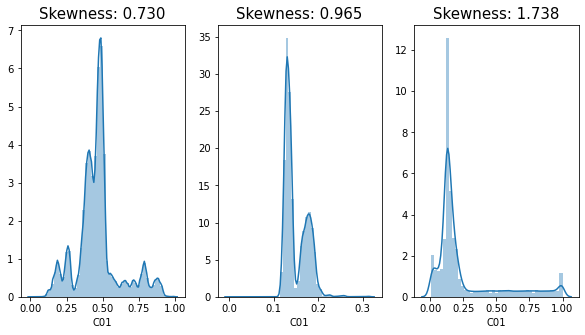

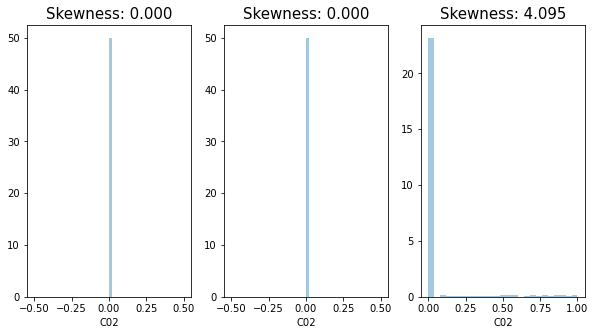

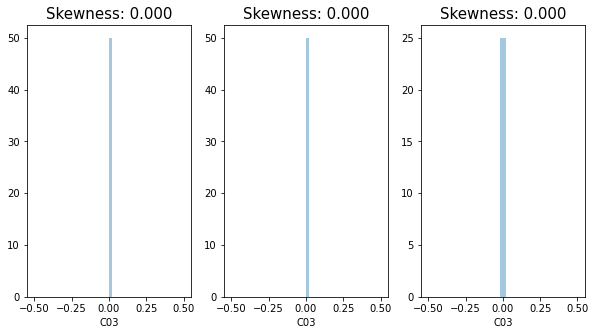

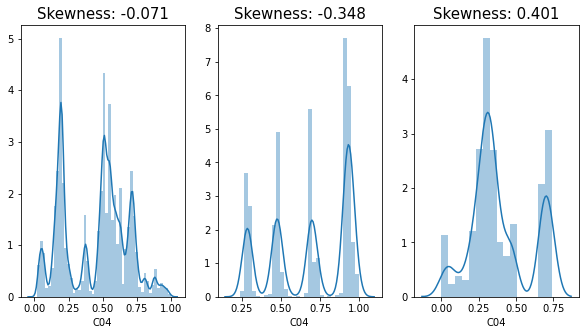

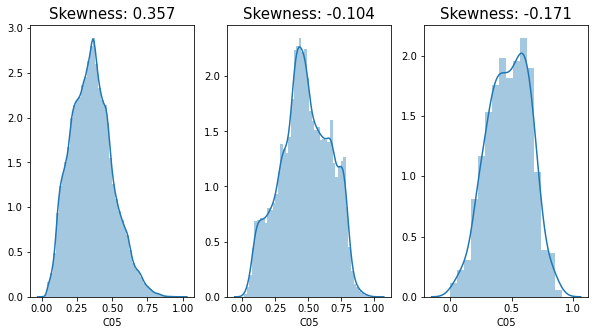

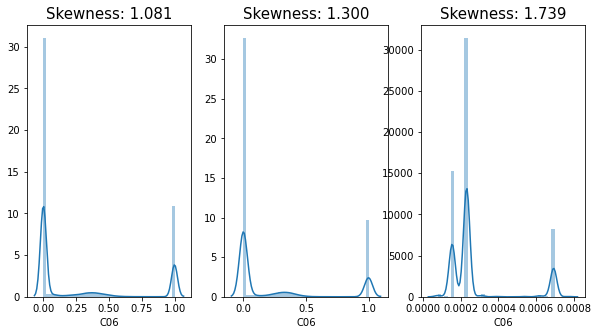

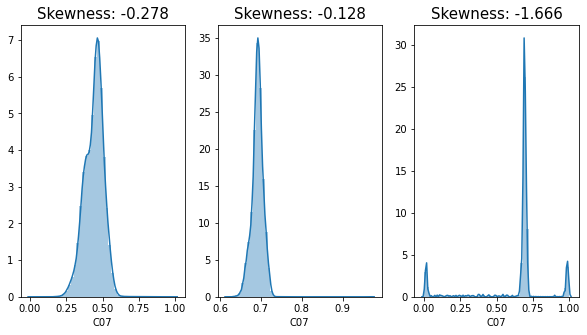

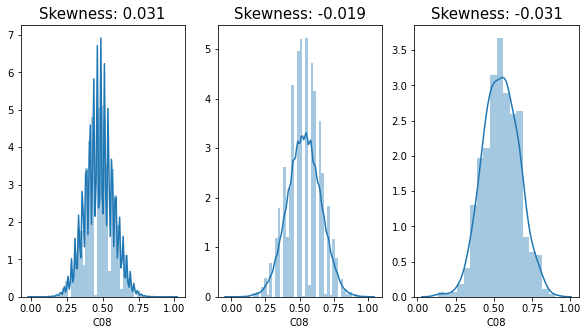

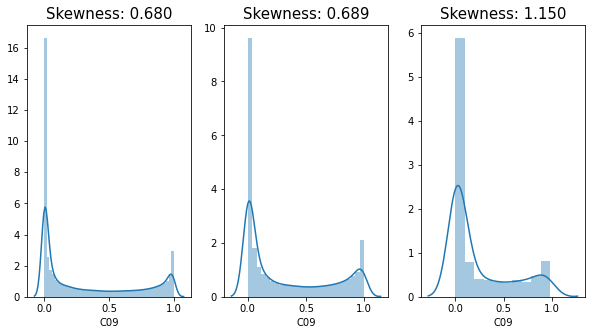

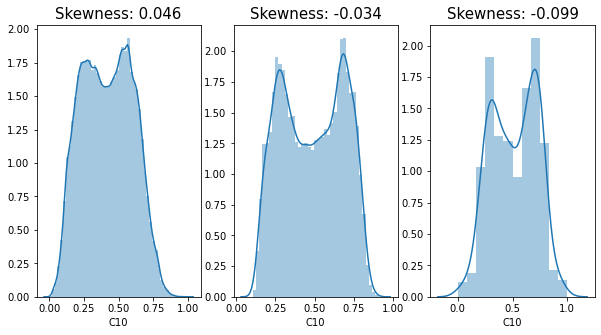

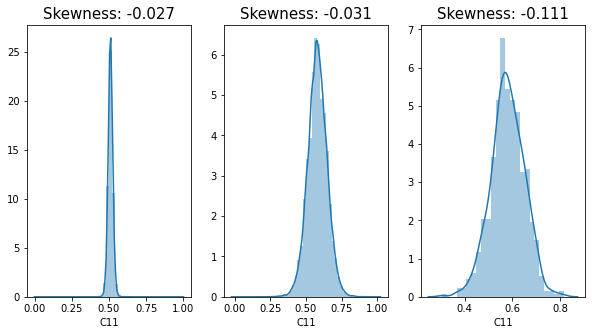

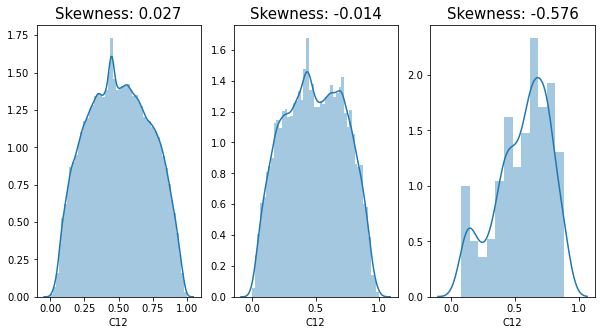

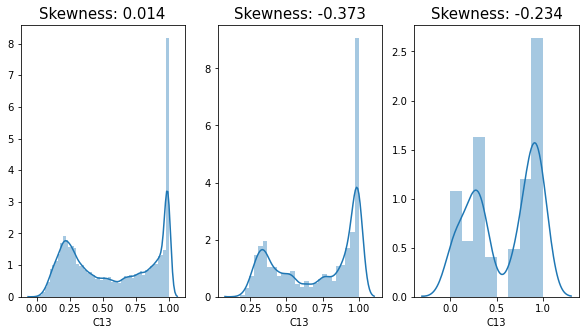

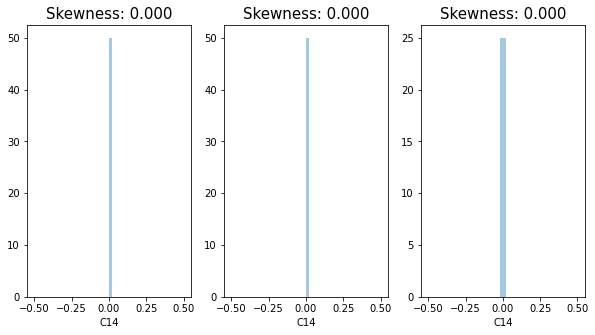

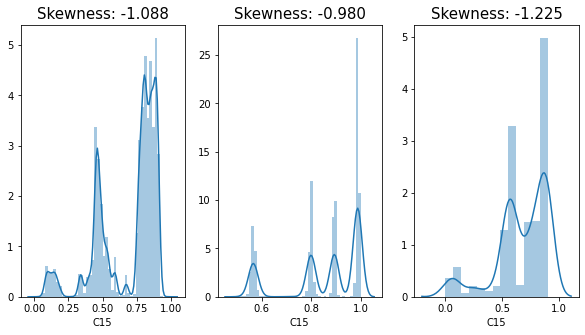

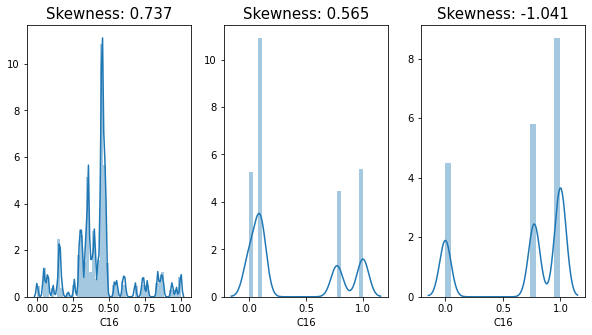

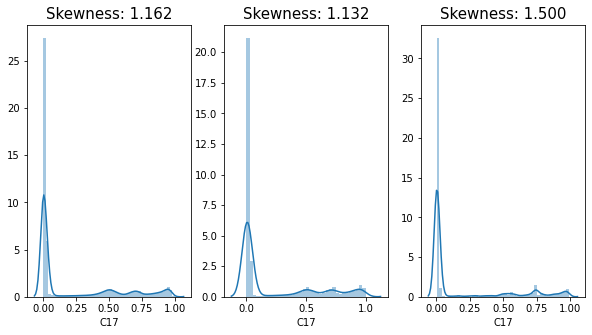

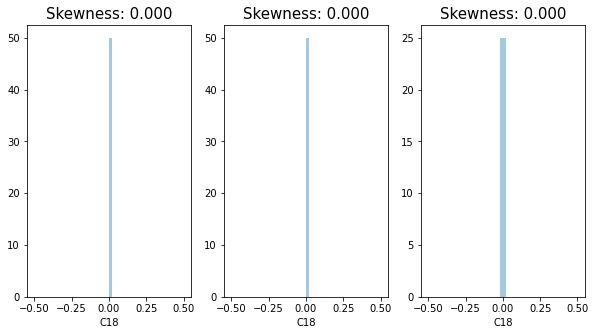

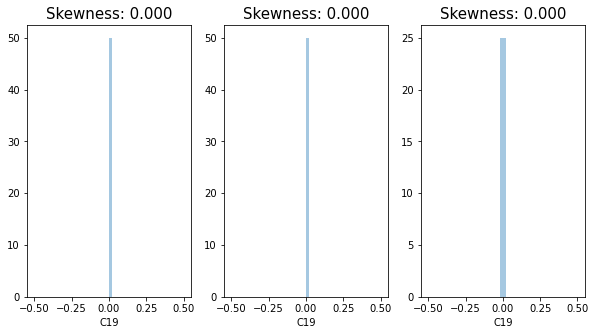

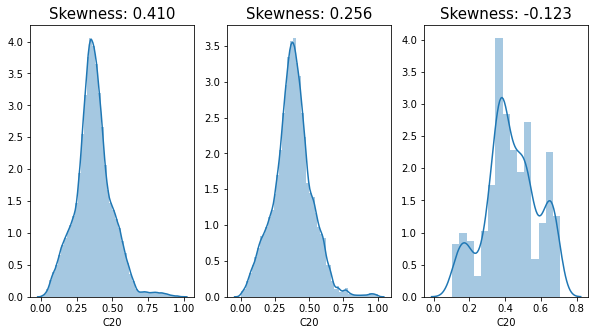

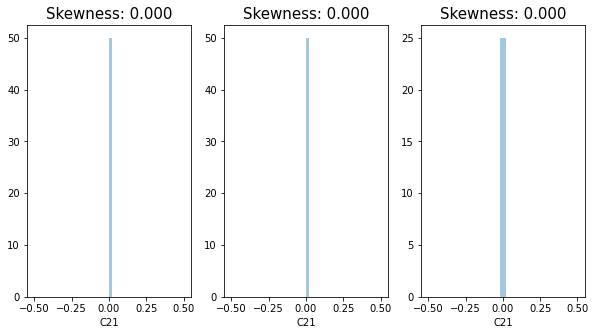

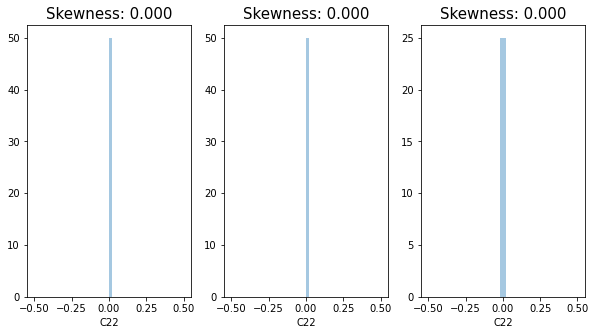

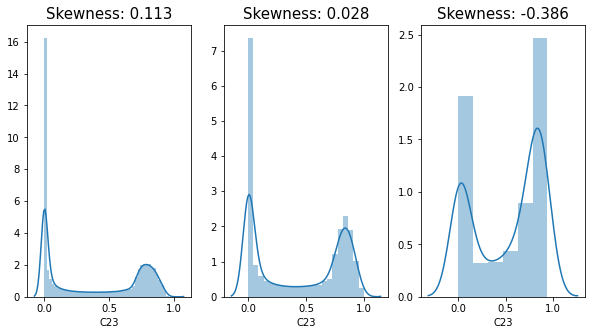

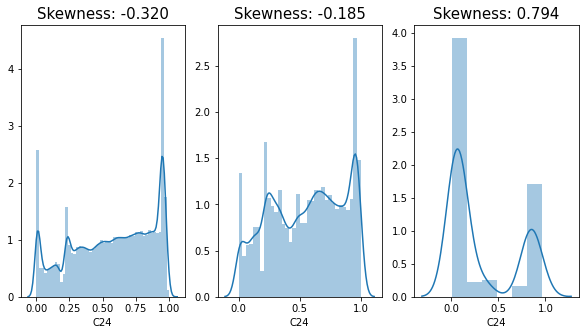

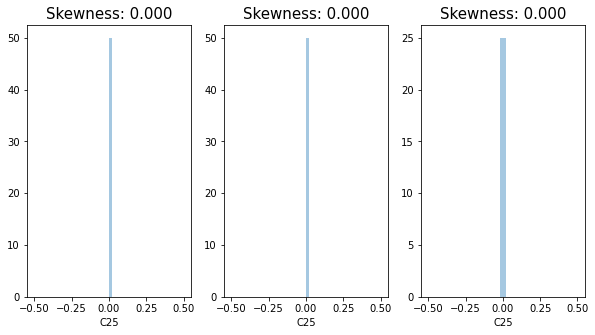

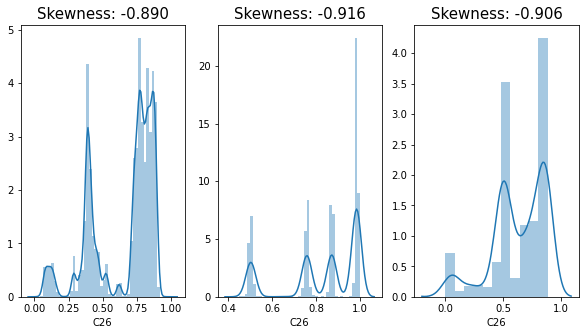

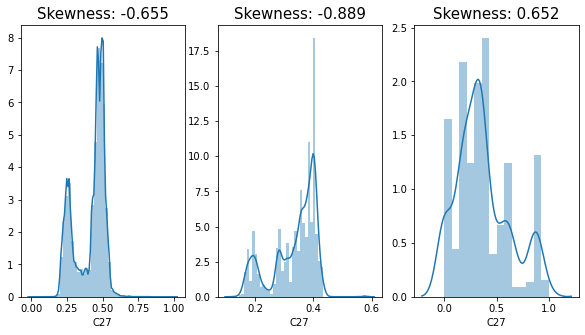

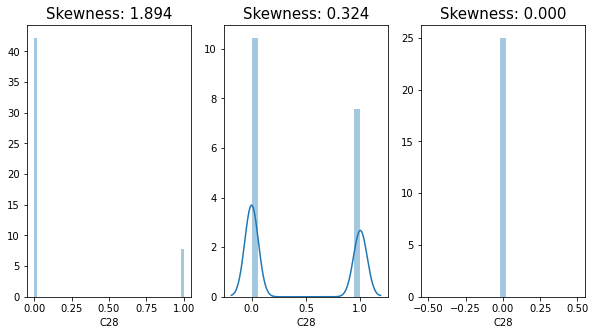

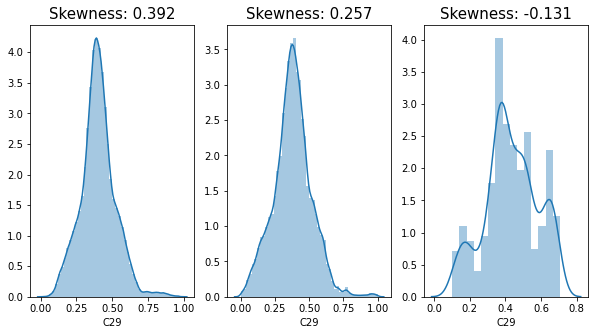

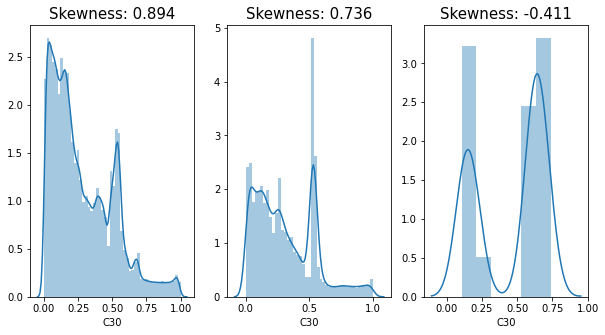

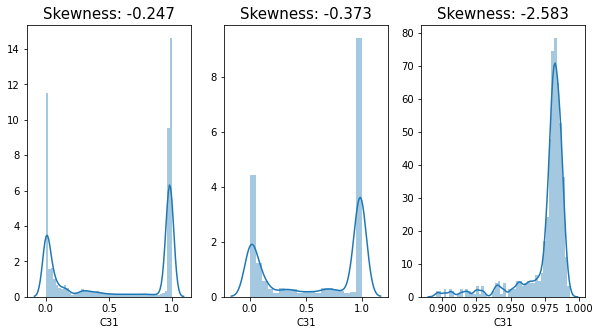

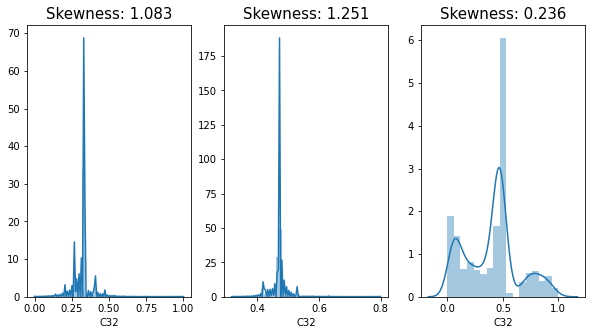

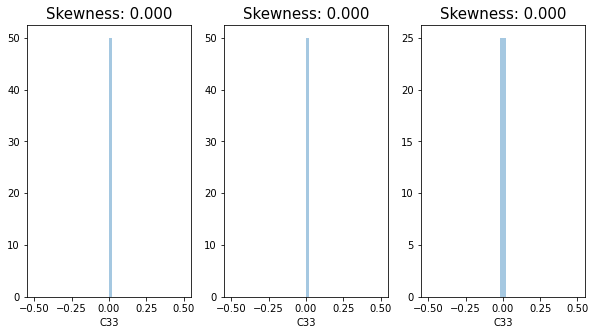

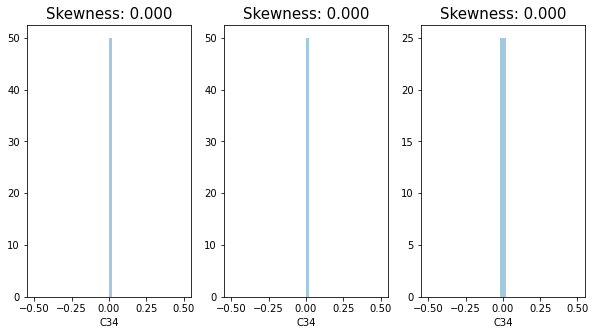

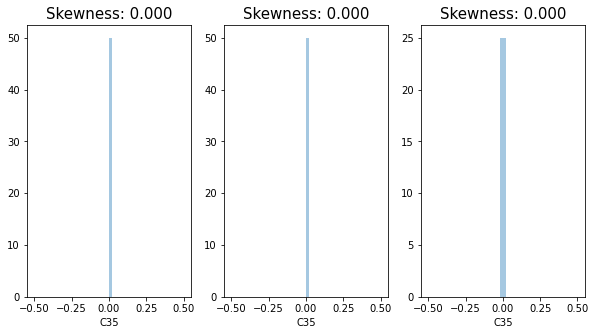

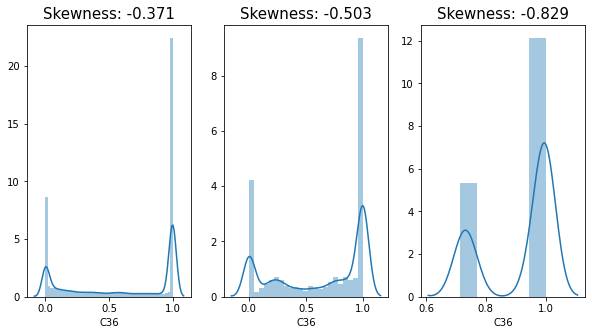

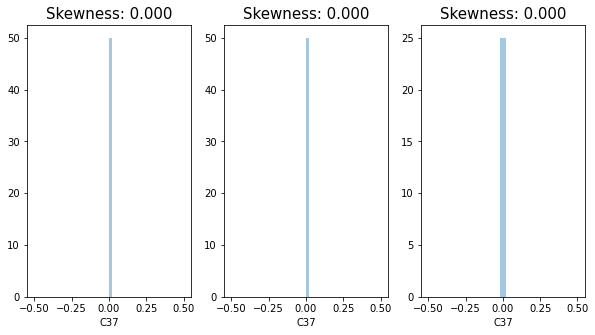

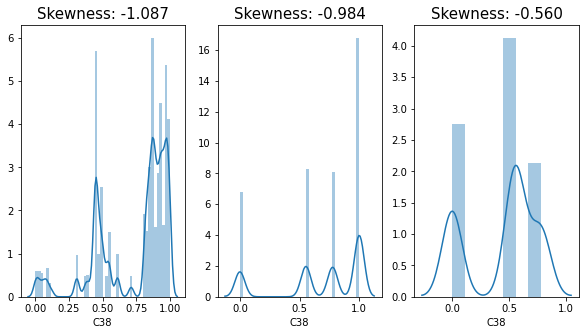

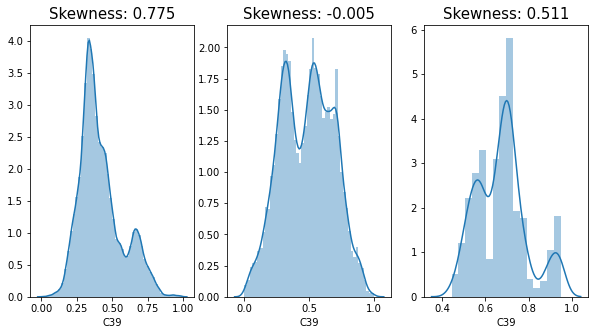

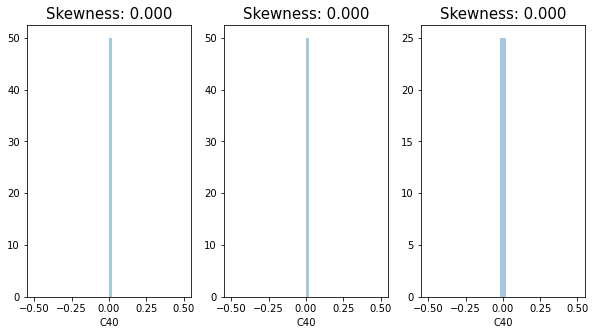

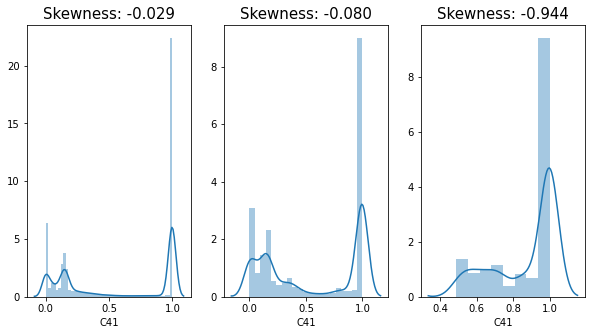

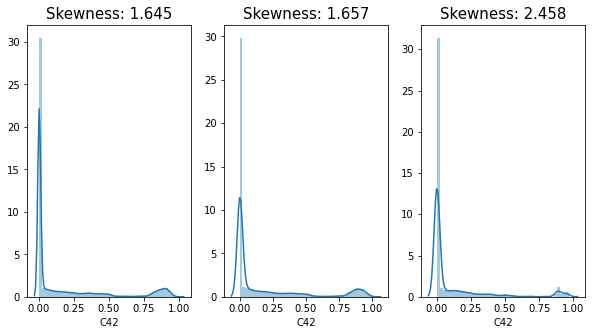

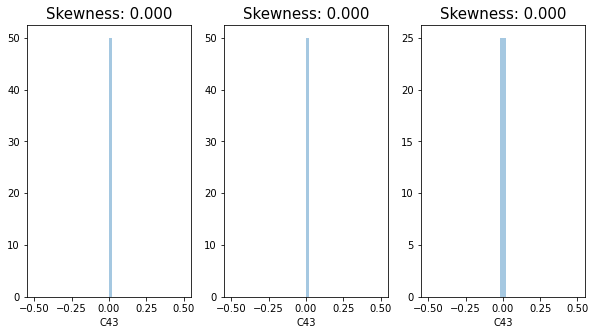

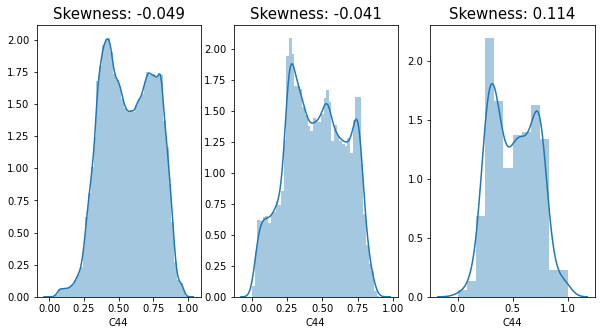

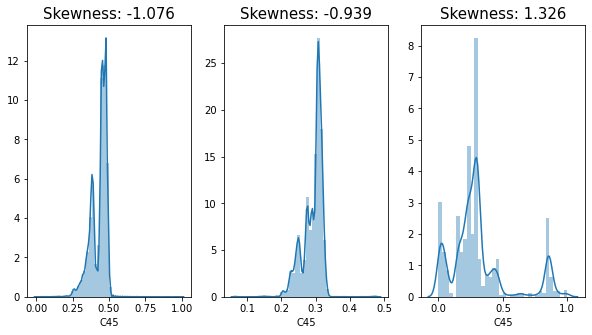

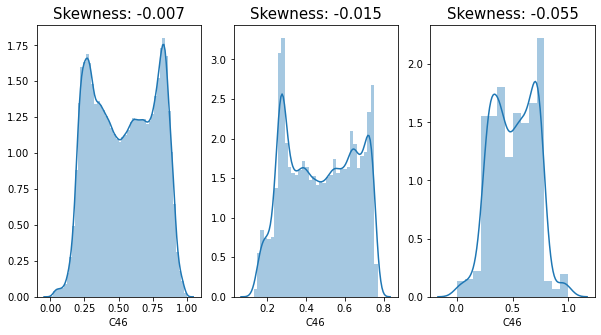

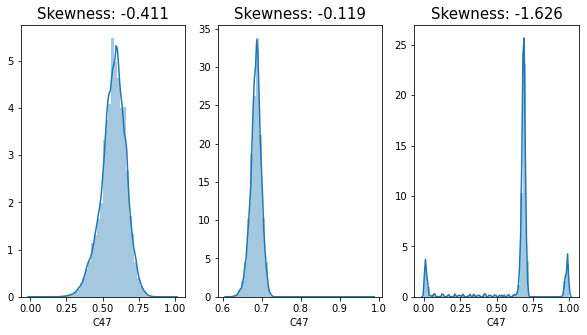

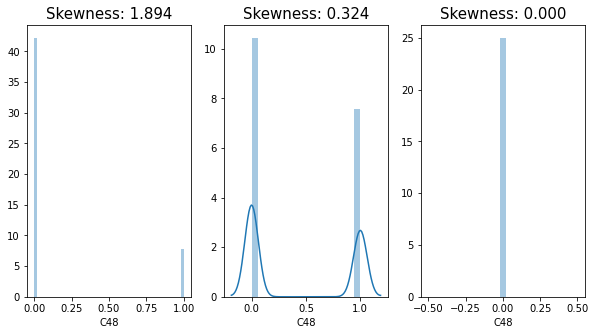

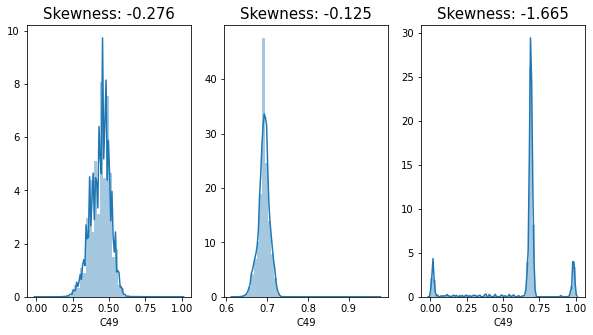

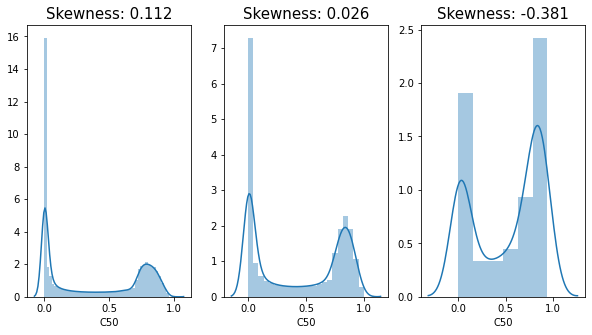

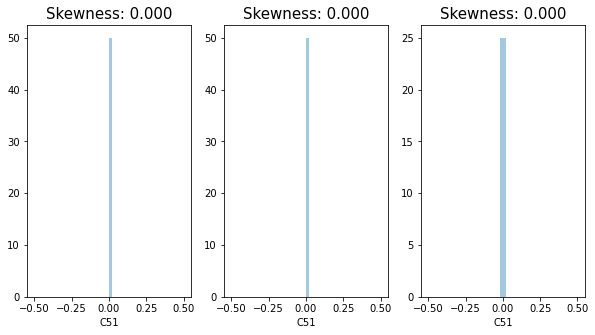

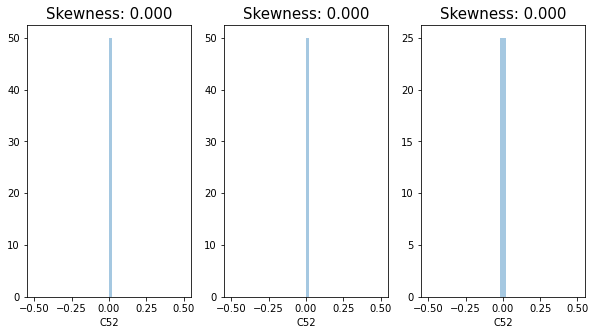

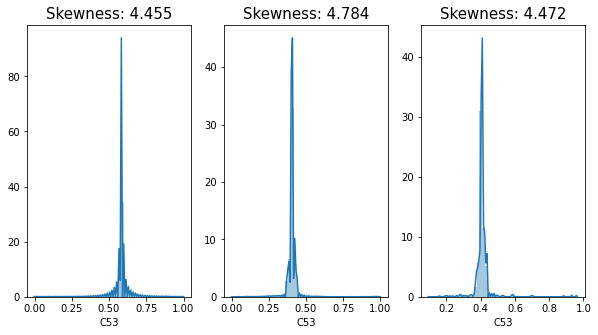

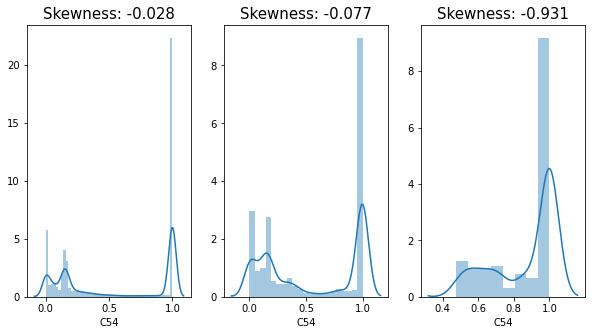

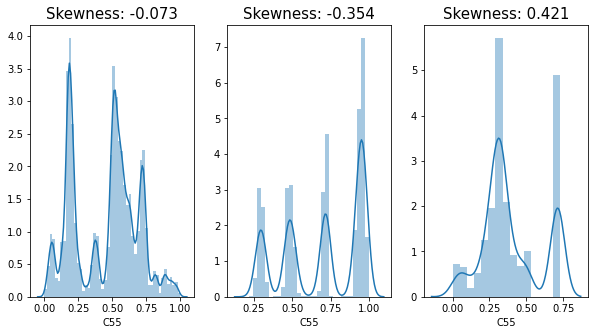

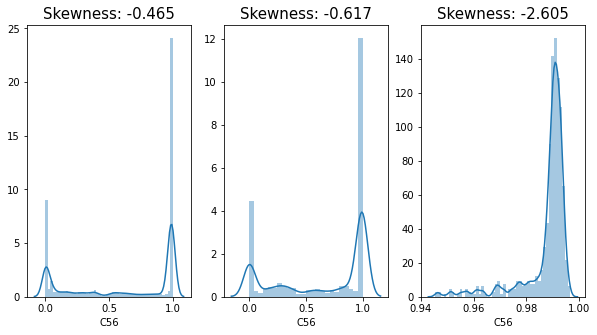

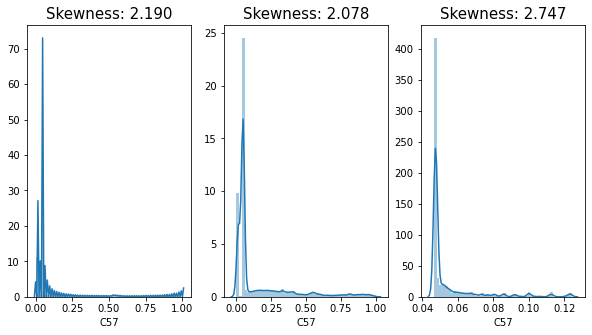

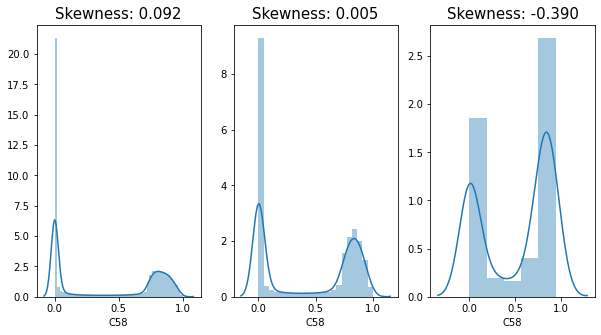

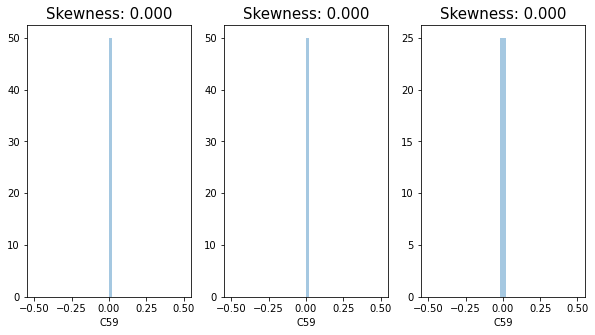

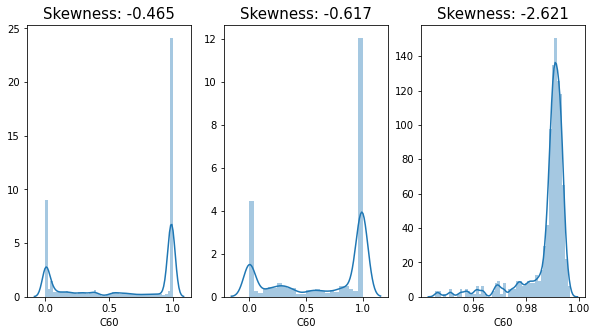

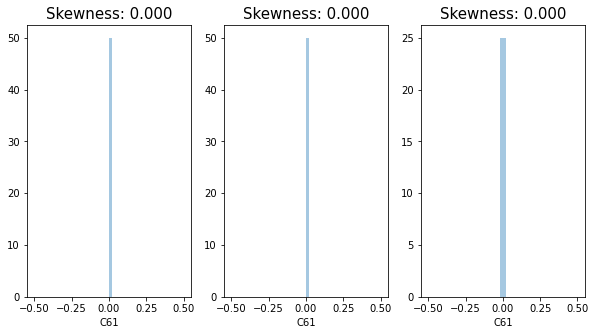

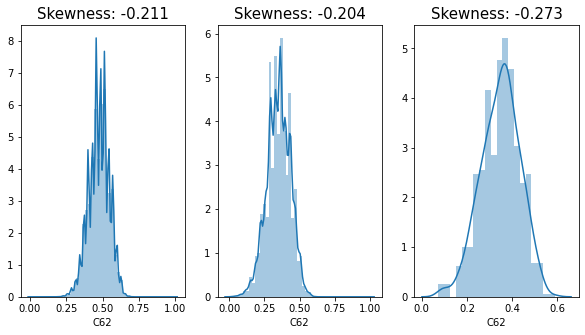

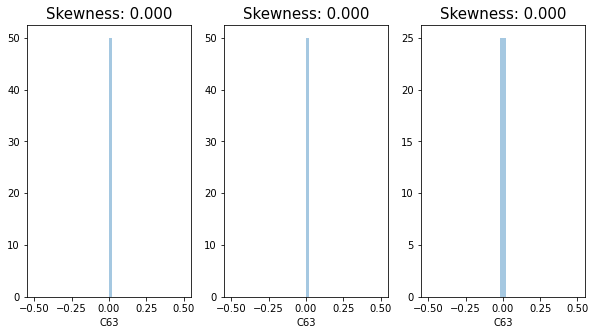

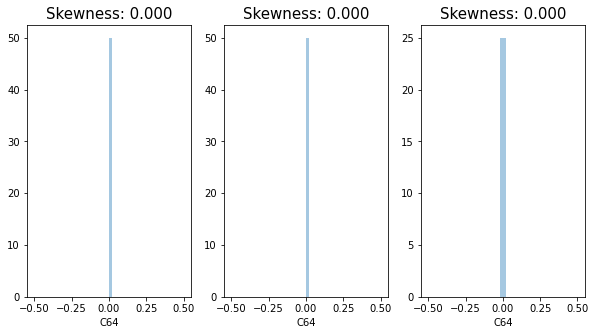

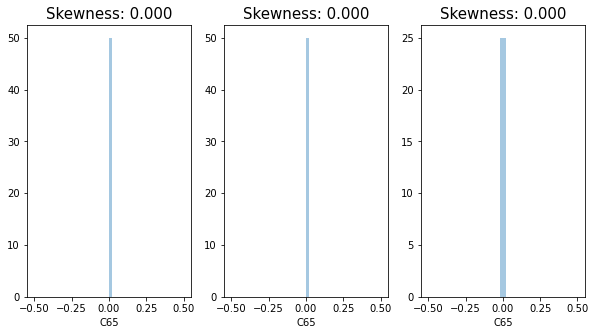

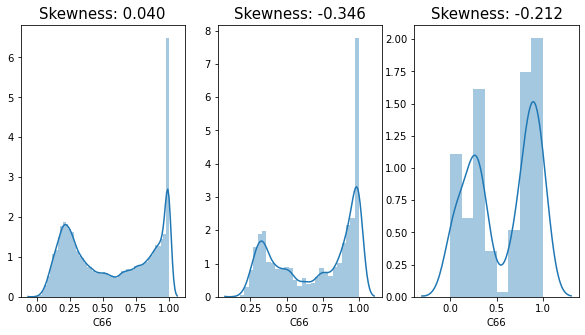

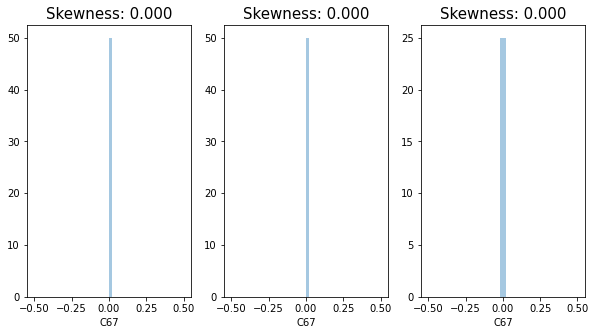

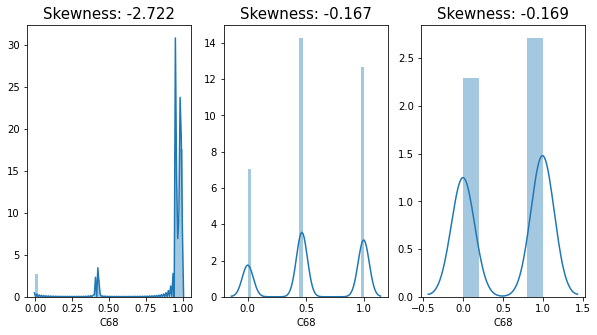

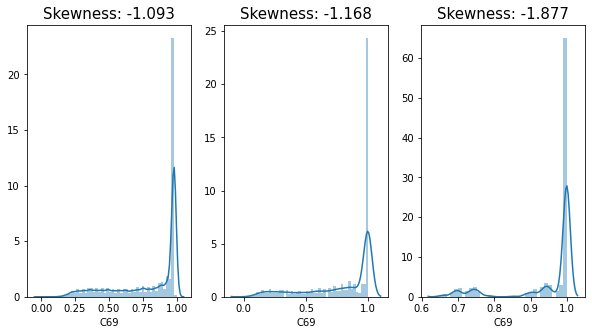

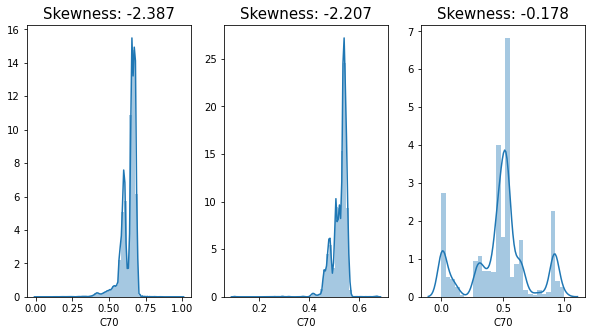

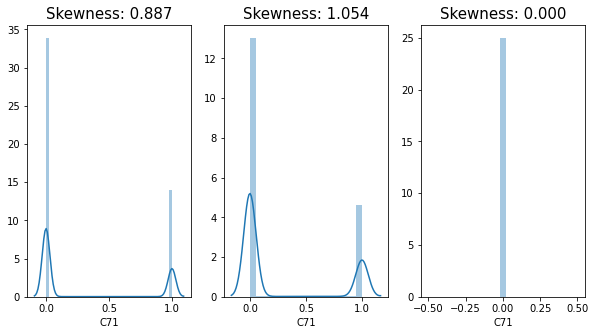

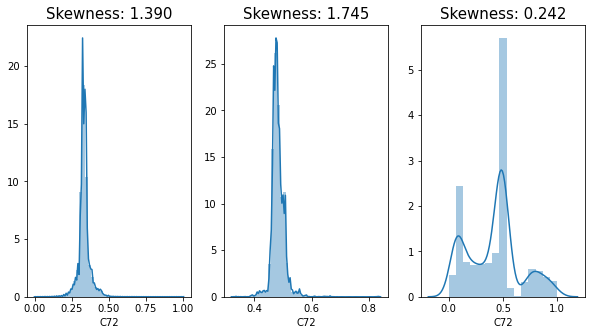

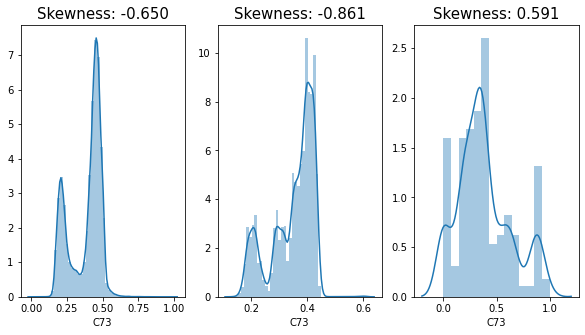

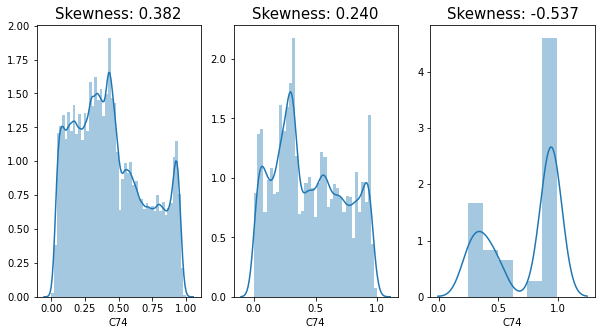

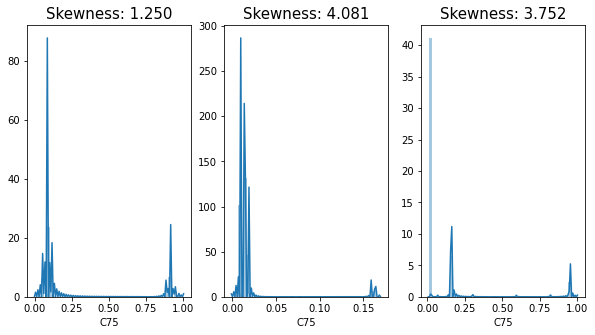

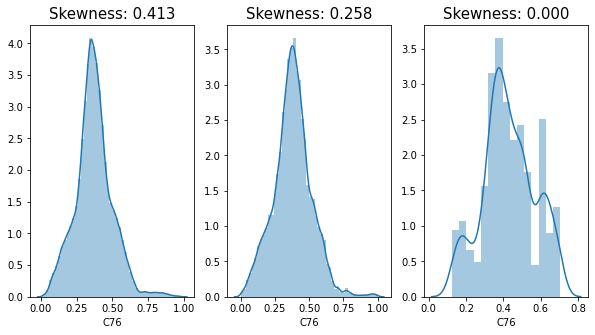

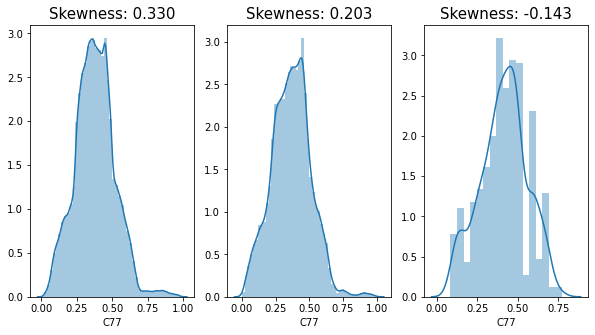

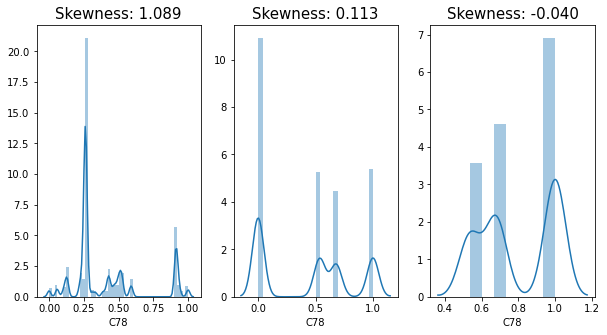

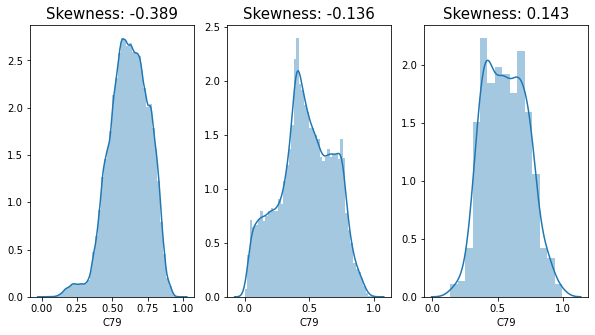

In [183]:
for i in (train_2.columns):
    f, ax = plt.subplots(1,3,figsize=(10,5))
    ax[0].set_title("Skewness: {:.3f}".format(train_2[i].skew()),fontsize=15)
    sns.distplot(train_2[i],ax=ax[0])
    ax[1].set_title("Skewness: {:.3f}".format(validation_2[validation_22['attack']==0][i].skew()),fontsize=15)
    sns.distplot(validation_22[validation_22['attack']==0][i],ax=ax[1])
    ax[2].set_title("Skewness: {:.3f}".format(validation_2[validation_22['attack']==1][i].skew()),fontsize=15)
    sns.distplot(validation_22[validation_22['attack']==1][i],ax=ax[2])



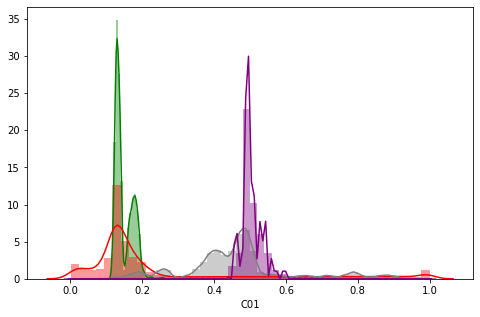

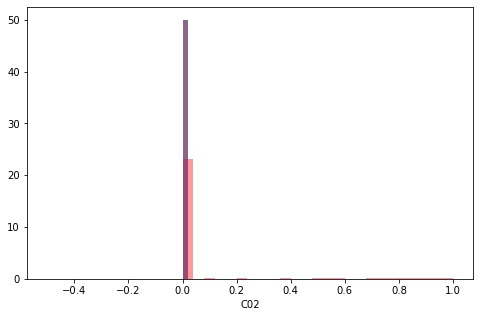

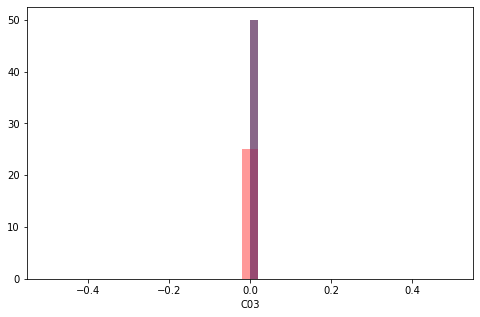

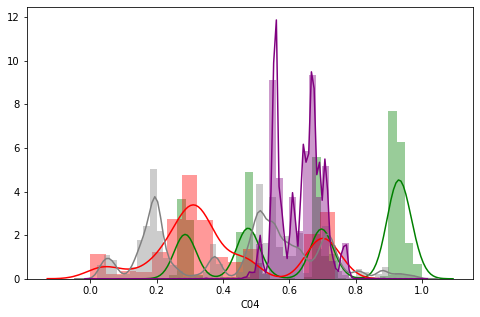

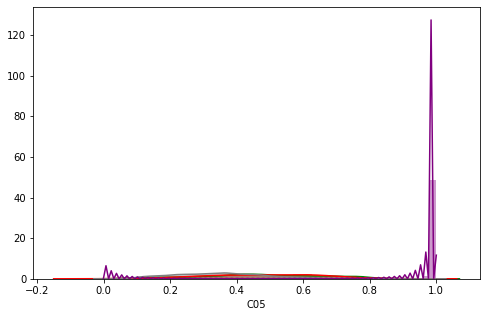

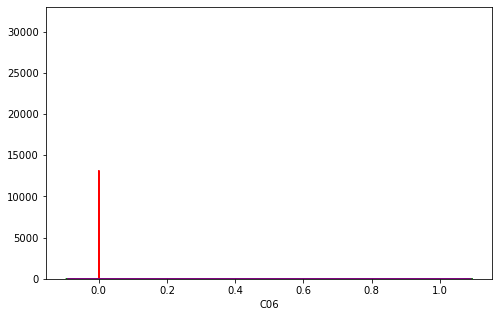

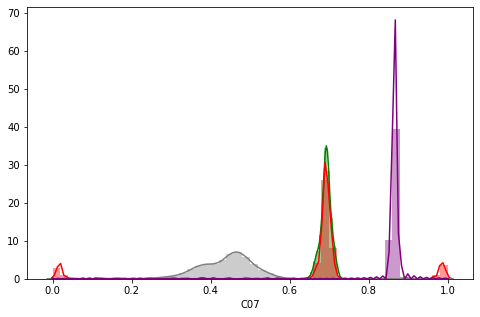

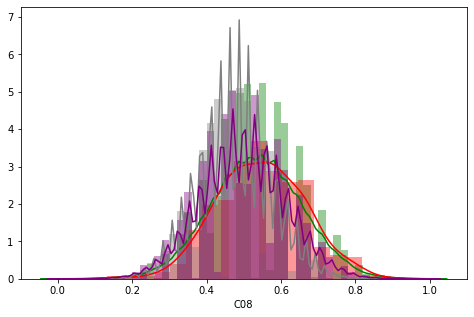

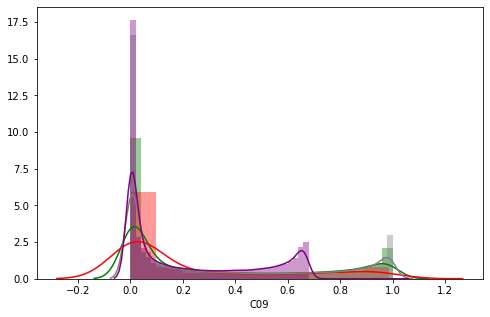

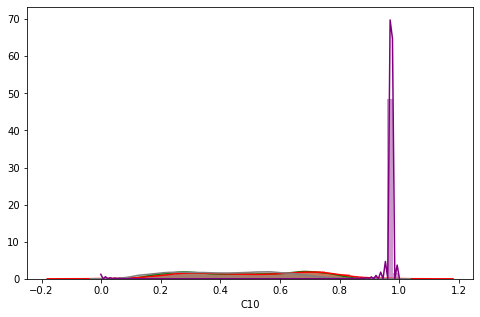

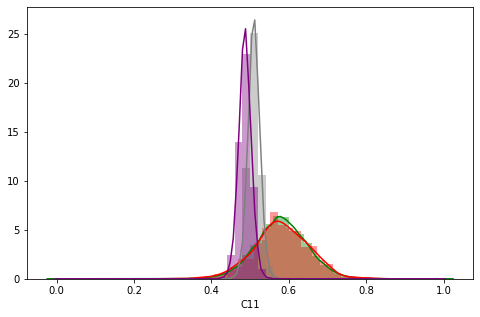

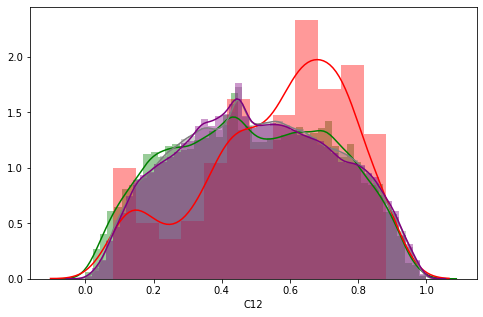

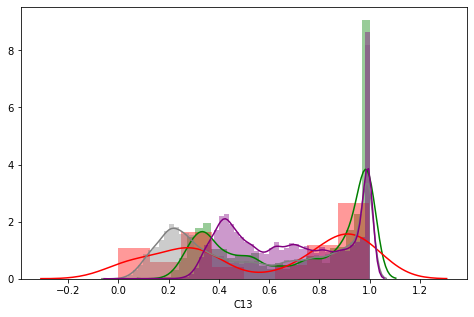

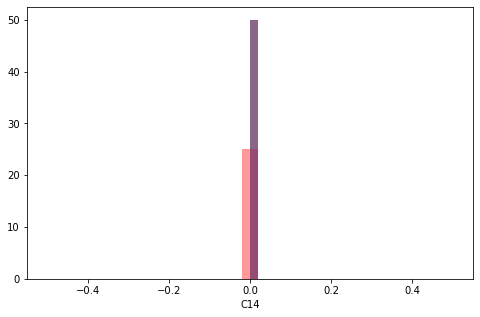

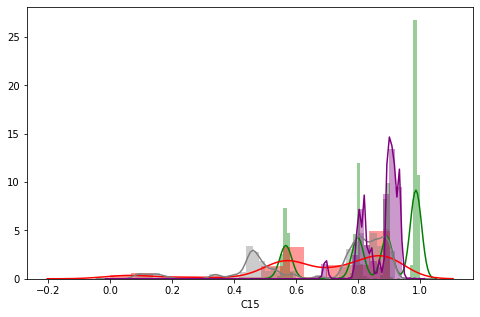

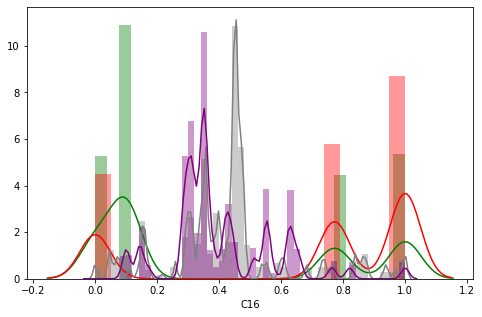

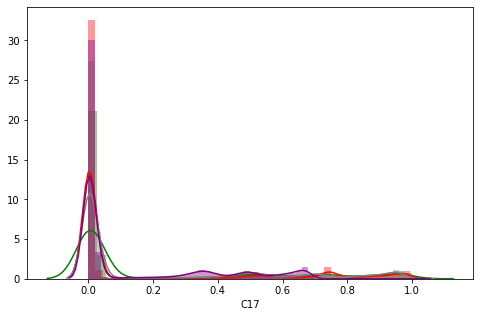

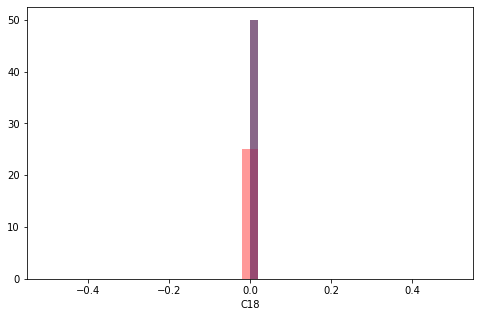

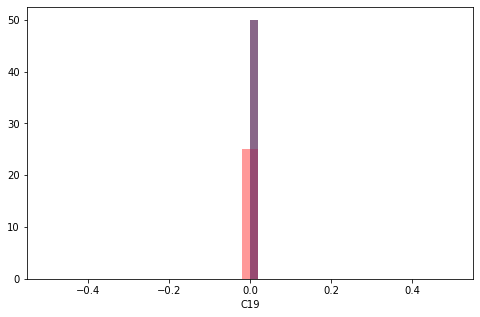

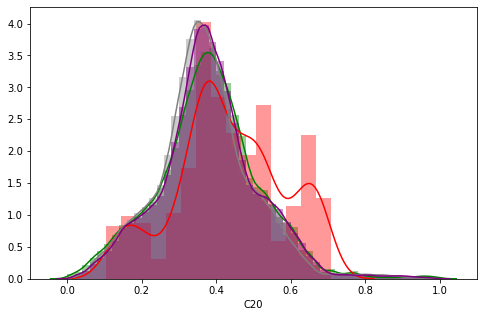

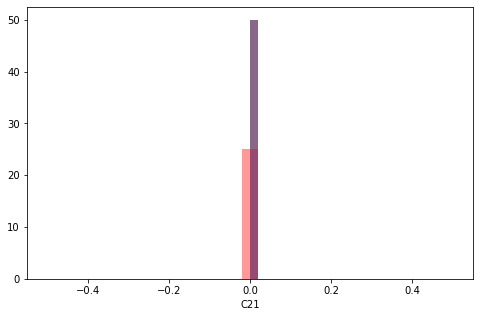

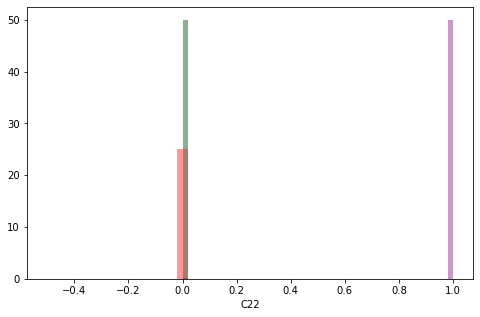

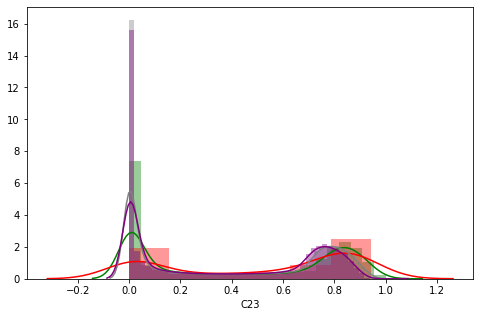

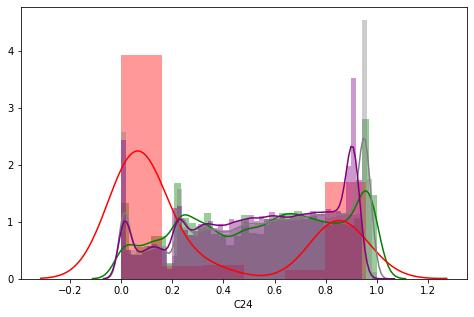

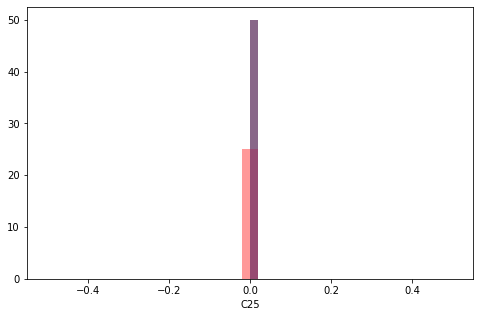

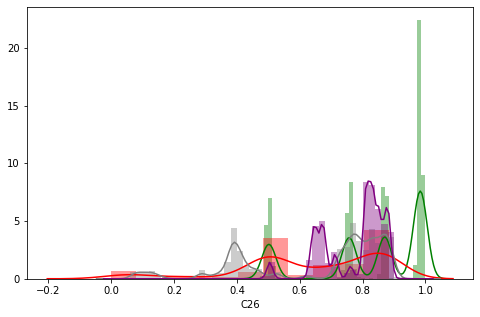

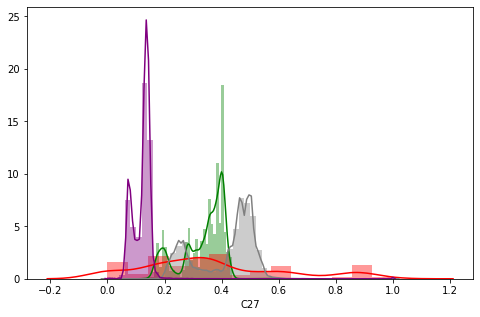

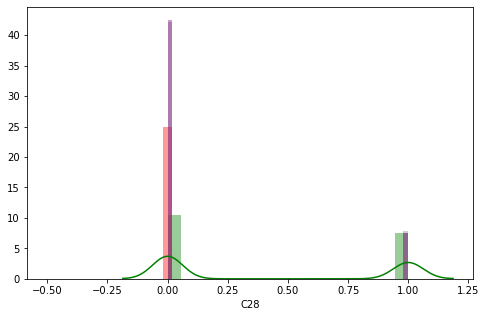

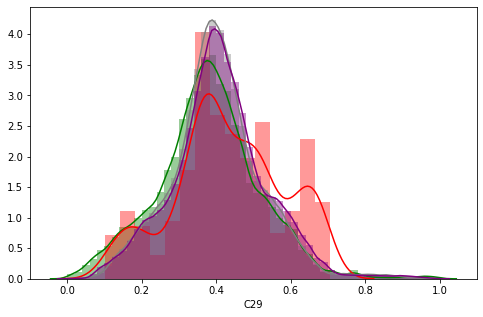

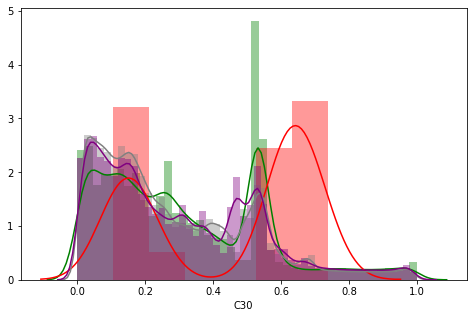

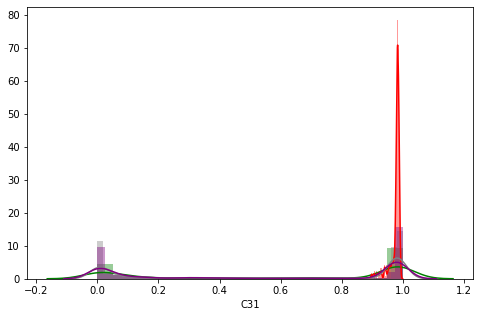

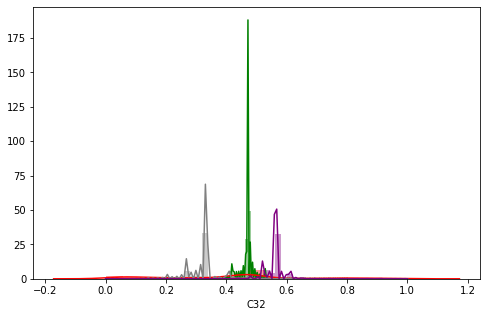

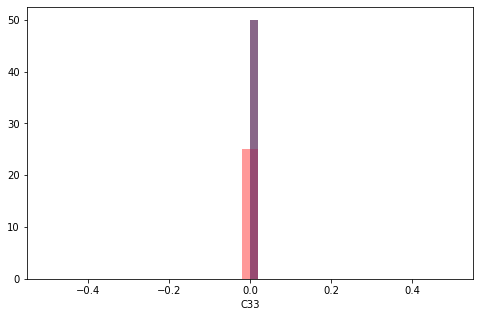

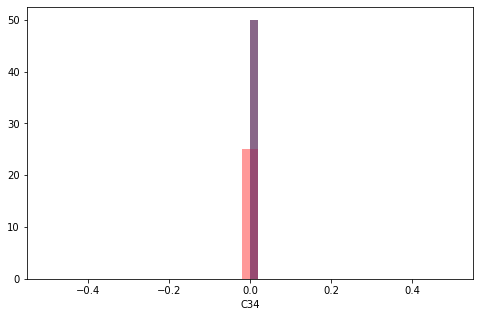

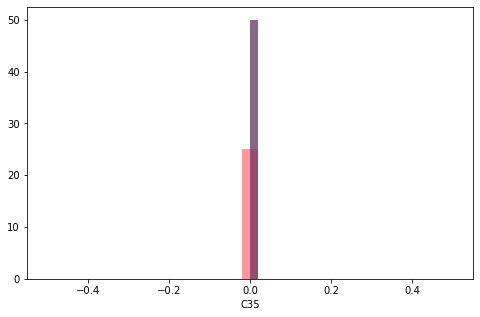

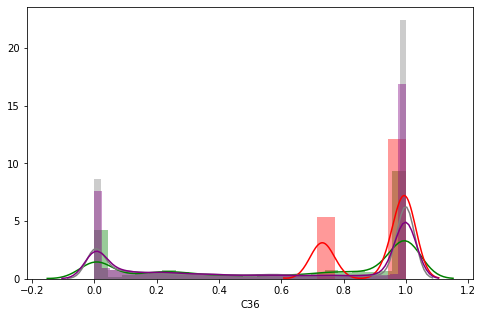

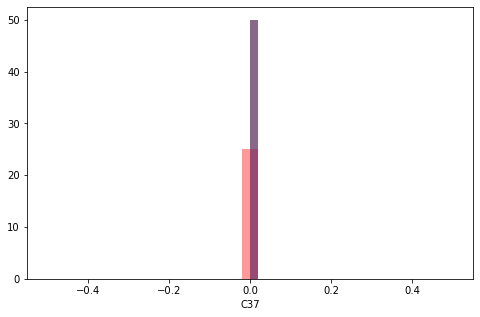

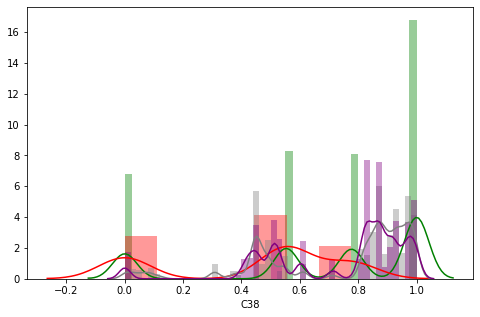

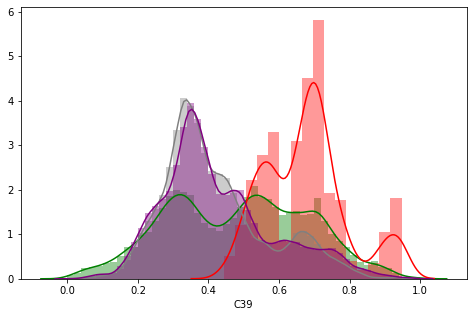

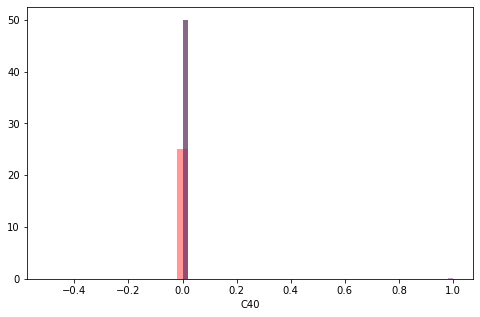

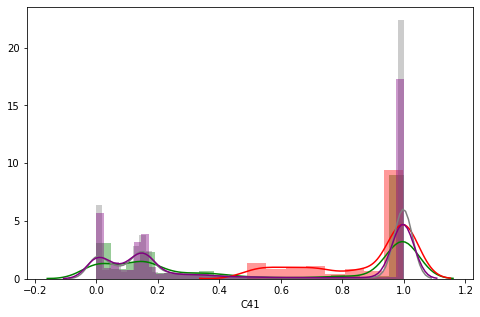

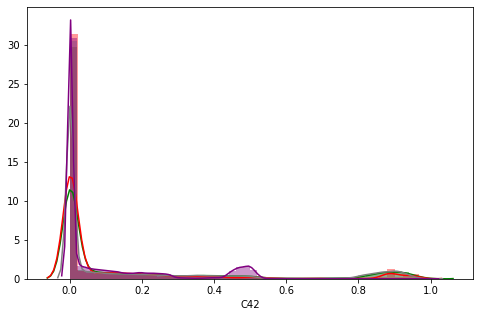

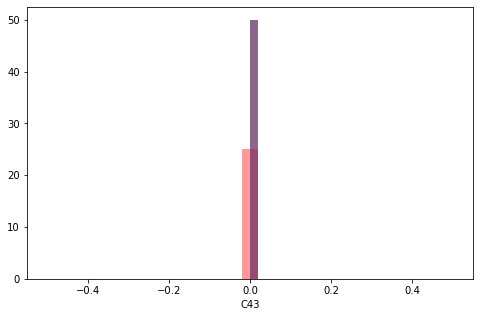

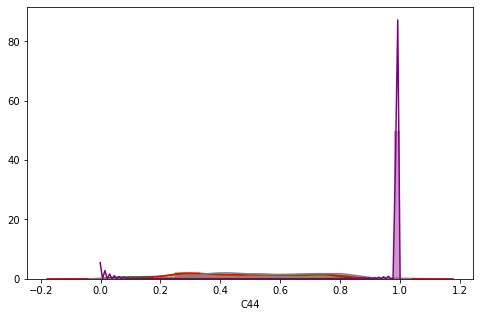

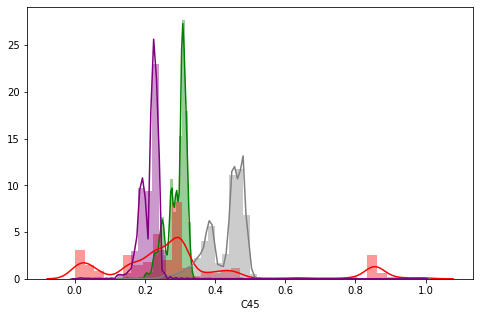

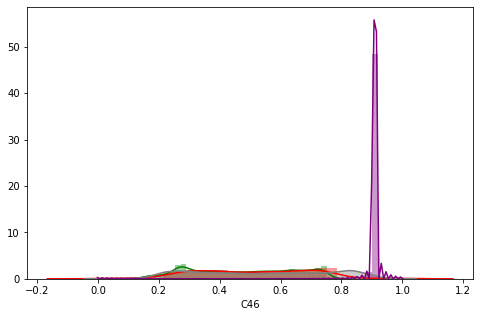

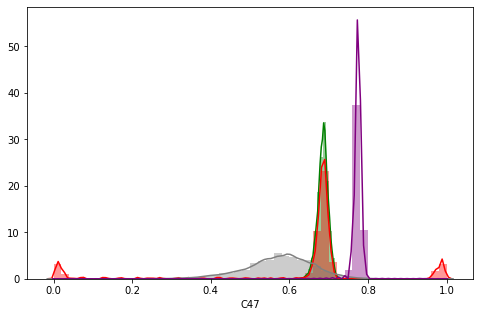

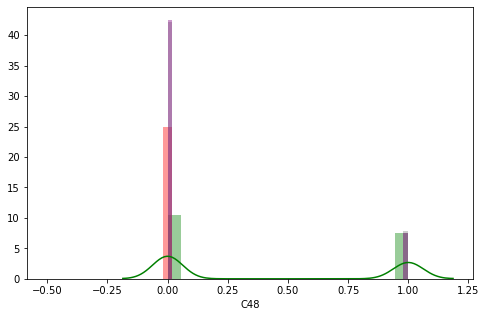

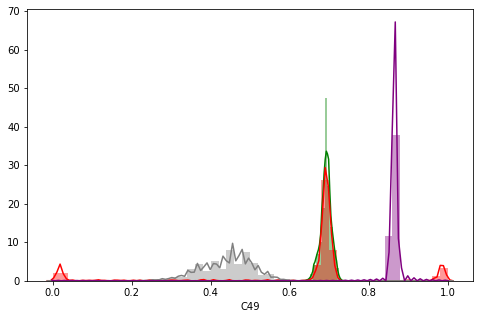

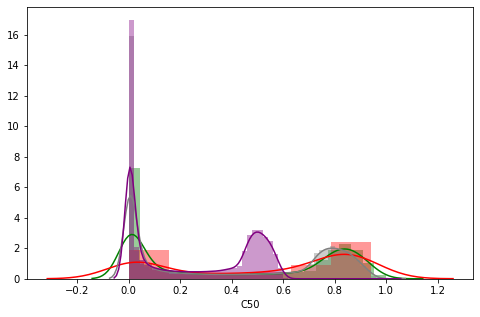

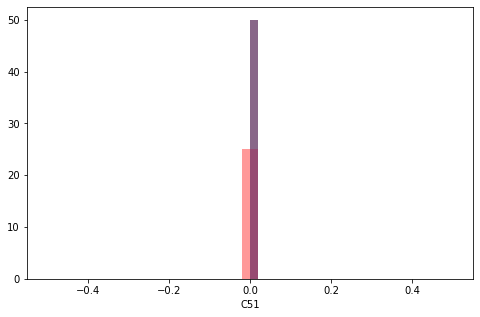

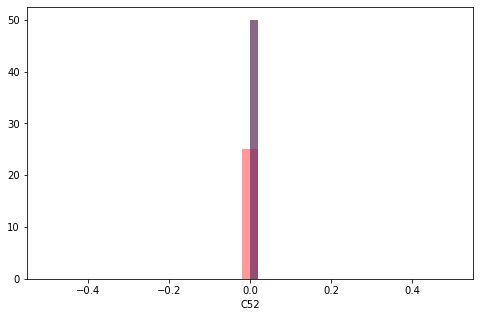

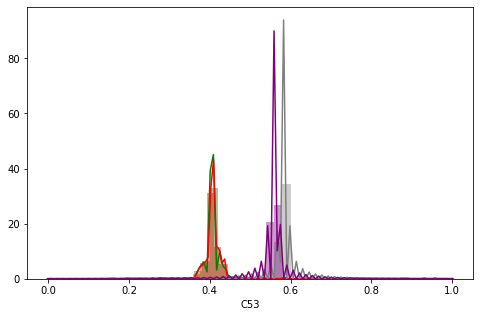

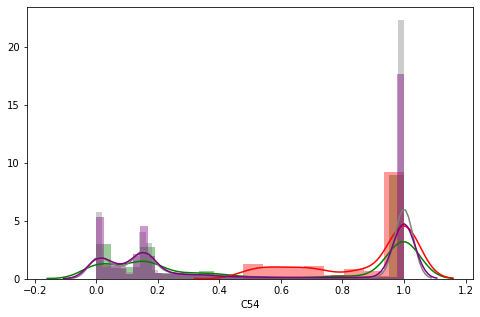

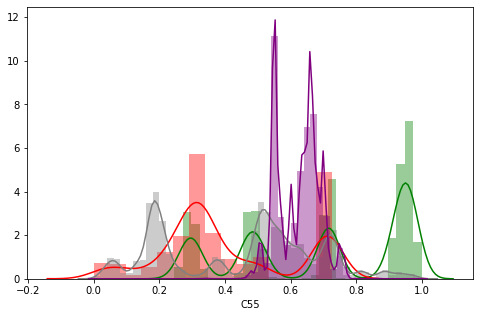

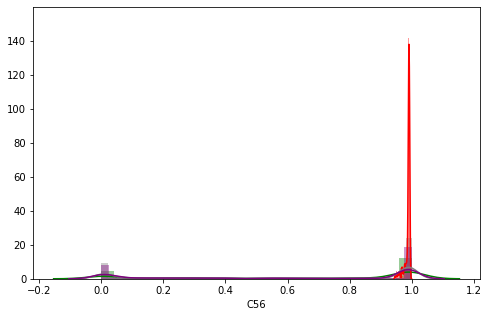

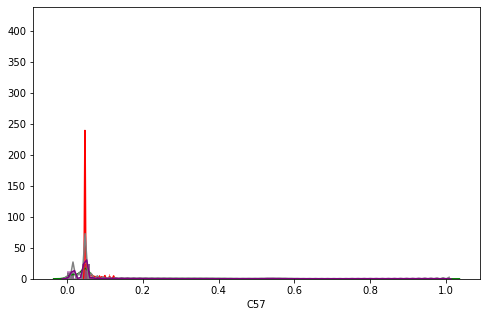

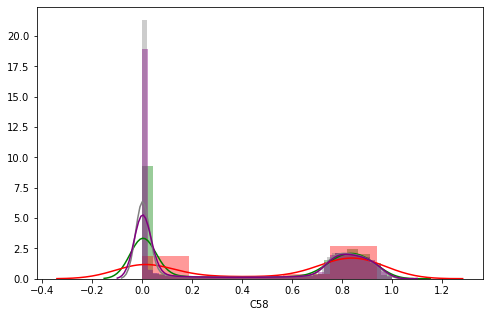

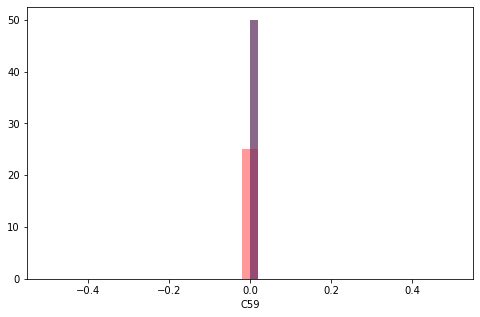

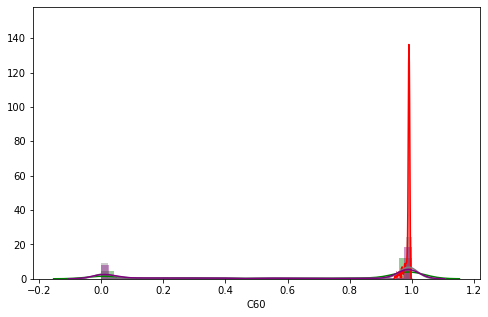

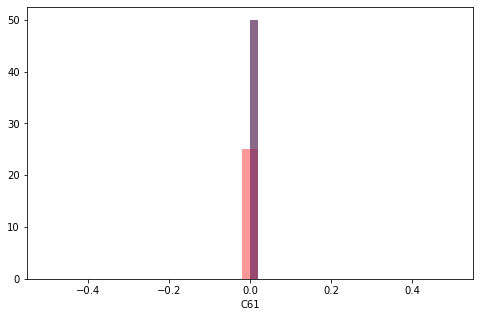

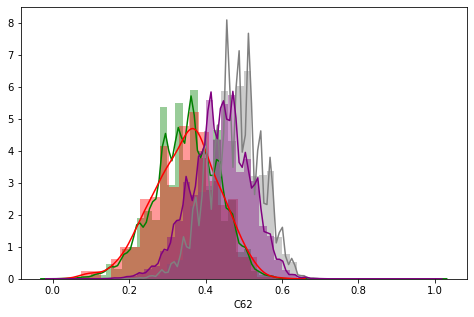

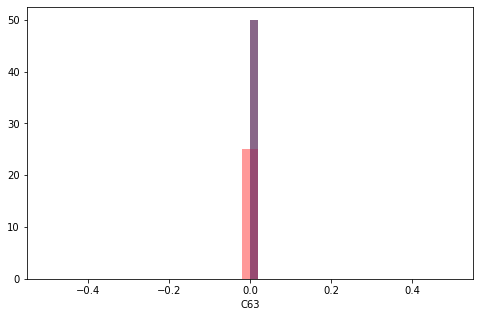

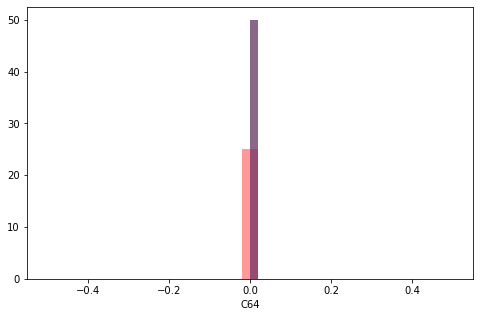

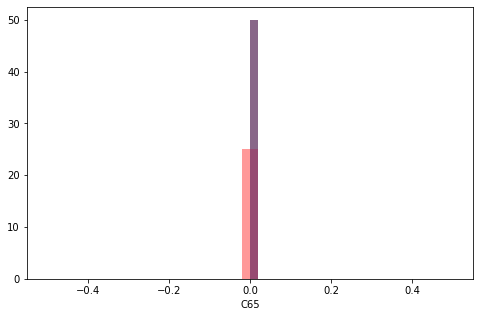

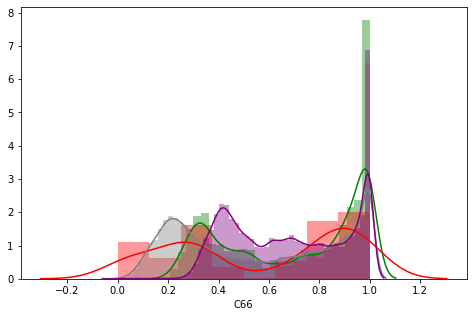

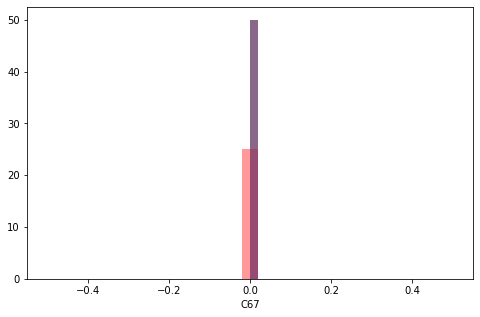

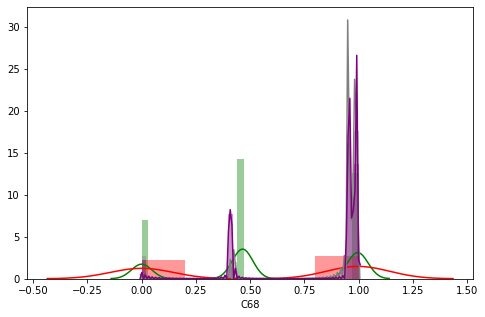

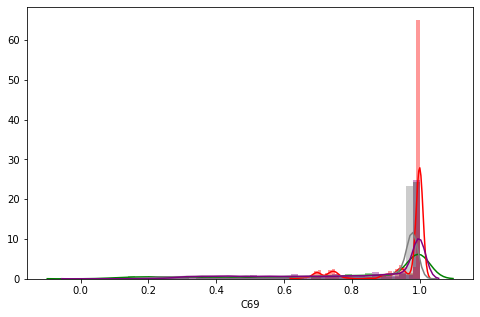

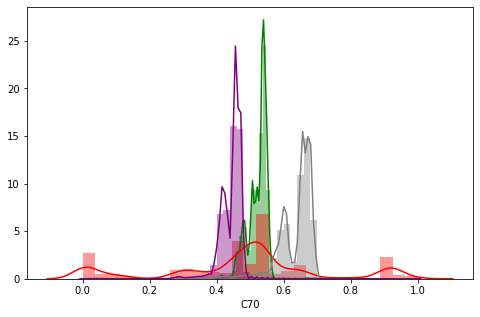

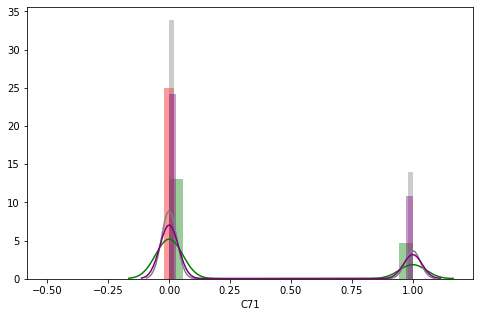

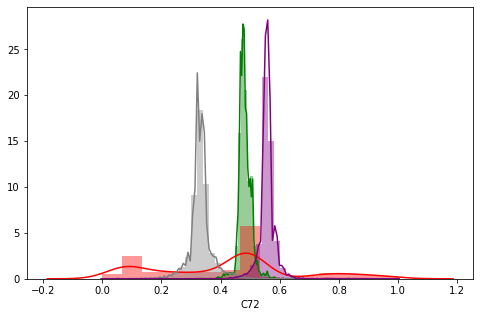

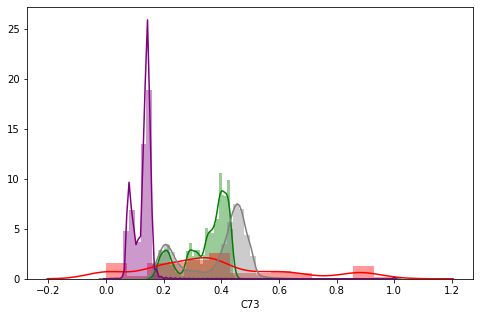

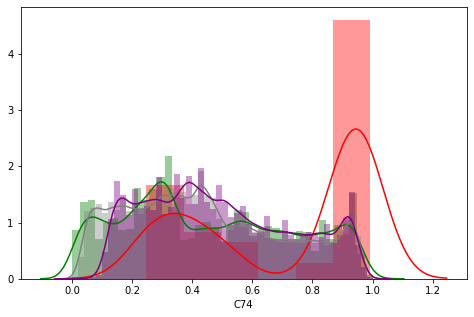

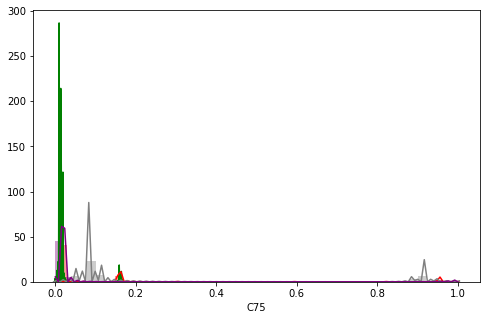

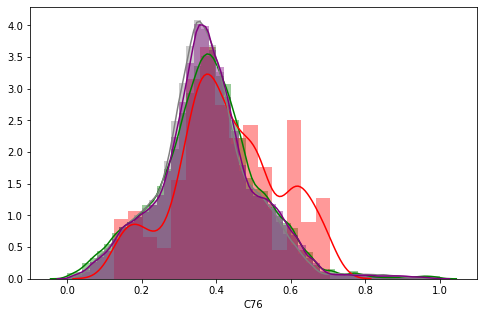

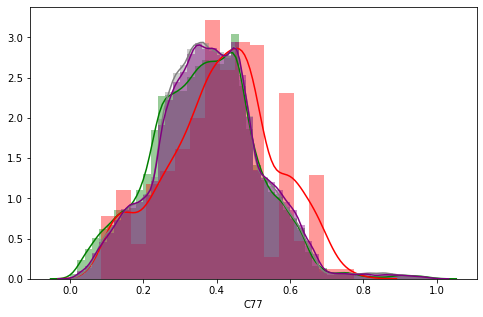

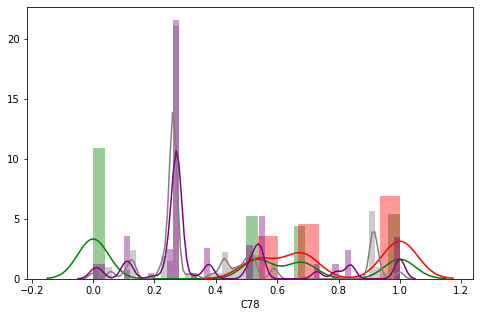

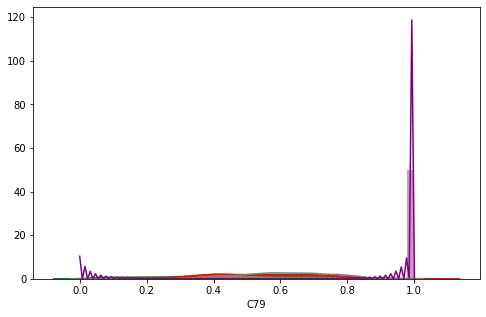

In [222]:
for i in (train_2.columns):
    plt.figure(figsize=(8,5))
    sns.distplot(validation_22.loc[validation_22['attack']==0,i],color='green')
    sns.distplot(validation_22.loc[validation_22['attack']==1,i],color='red')
    sns.distplot(train_2[i],color='gray')
    sns.distplot(test_2[i],color='purple')

In [112]:
print('정상 데이터 중앙값  :' ,train_2['C01'].median(),
     '\n어택1 데이터 중앙값 :',validation_22[validation_22['attack']==1]['C01'].median() )

정상 데이터 중앙값  : 0.4619565170114367 
어택1 데이터 중앙값 : 0.1422915558628631


In [215]:
validation_22[validation_22['attack']==1]['C04']

2111     0.274383
2112     0.274383
2113     0.274383
2114     0.274383
2115     0.274383
           ...   
21885    0.694753
21886    0.694753
21887    0.694753
21888    0.694753
21889    0.694753
Name: C04, Length: 629, dtype: float64

In [213]:
test_2[test_2["C04"]<0.3]

,C01,C02,C03,C04,C05,C06,C07,C08,C09,C10,...,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79
6367,0.409009,0.086122,0.0,0.291020,0.992025,0.000384,0.868929,0.586721,0.005437,0.980377,...,0.000000,0.0,0.866171,0.005595,0.189028,0.011312,0.310764,0.321360,0.272771,0.993517
6368,0.407415,0.092968,0.0,0.282475,0.991276,0.000384,0.872365,0.527439,0.005049,0.981487,...,0.000000,0.0,0.839600,0.005595,0.182929,0.011878,0.318044,0.337377,0.272771,0.991428
6369,0.405503,0.095840,0.0,0.281324,0.989153,0.000384,0.874727,0.674797,0.005049,0.979243,...,0.000000,0.0,0.814002,0.008506,0.182929,0.010747,0.323627,0.350123,0.272771,0.990668
6370,0.403803,0.097024,0.0,0.281242,0.987270,0.000384,0.874026,0.590108,0.004660,0.974654,...,0.005086,0.0,0.773495,0.009113,0.170737,0.011312,0.327585,0.361982,0.272771,0.992447
6371,0.402210,0.088913,0.0,0.281160,0.987377,0.000384,0.867812,0.443767,0.004272,0.972064,...,0.000000,0.0,0.767986,0.012371,0.176831,0.022059,0.333663,0.372274,0.272771,0.995072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88373,0.519813,0.000000,0.0,0.214362,0.989933,0.000461,0.855894,0.470190,0.029126,0.974312,...,0.393163,0.0,0.376864,0.150514,0.189028,0.046380,0.327232,0.375545,0.272771,0.996952
88374,0.523744,0.000000,0.0,0.232356,0.988907,0.000461,0.857002,0.385501,0.028350,0.972868,...,0.394036,0.0,0.384318,0.150223,0.189028,0.046380,0.331401,0.369956,0.272771,0.997024
88375,0.527568,0.000000,0.0,0.251171,0.988019,0.000461,0.855336,0.413957,0.027184,0.971982,...,0.396438,0.0,0.385614,0.149138,0.195122,0.046946,0.337974,0.385223,0.272771,0.996659
88376,0.530755,0.000000,0.0,0.269247,0.989450,0.000461,0.867309,0.501016,0.025631,0.972912,...,0.399058,0.0,0.385291,0.145802,0.195122,0.046380,0.340024,0.381066,0.272771,0.994358


In [250]:
print('정상 데이터:', validation_22[validation_22['attack']==0].shape[0],
      '\n어택상황 데이터:', validation_22[validation_22['attack']==1].shape[0],
      '\n어택 데이터 비율:',validation_22[validation_22['attack']==1].shape[0]/validation_22[validation_22['attack']==0].shape[0], 
      '\n약 전체의 %.3f가 어택상황' % (validation_22[validation_22['attack']==1].shape[0]/validation_22[validation_22['attack']==0].shape[0]) )

정상 데이터: 42572 
어택상황 데이터: 629 
어택 데이터 비율: 0.014774969463497134 
약 전체의 0.015가 어택상황
